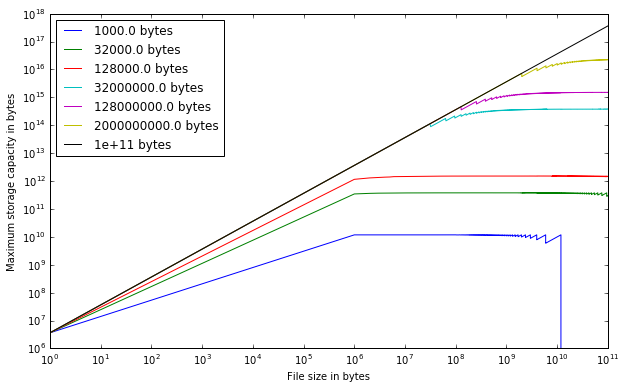

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

#initialize file sizes
average_file_size = np.linspace(1, 100000000000, 100000)

#initialize system parameters
memory = 2000000000.
block_sizes = [1000., 32000., 128000., 32000000., 128000000., 2000000000., 100000000000.]


plt.figure(figsize=(10,6))
plt.xscale('log')
plt.yscale('log')
#run simulation for each block size
for j in range(7):
    #calculate number of blocks per file, take ceiling function
    average_blocks = average_file_size / block_sizes[j]
    for i in range(len(average_blocks)):
        average_blocks[i] = math.ceil(average_blocks[i])
    
    #calculate the number of files whose metadata fits in memory, take floor function
    num_files = (memory)/(169 * average_blocks + 380)
    for i in range(len(num_files)):
        num_files[i] = math.floor(num_files[i])
    
    #convert number of files into bytes in storage, and plot
    stored_on_disk = num_files * average_file_size
    plt.plot(average_file_size, stored_on_disk, label= str(block_sizes[j]) + ' bytes')

plt.xlabel("File size in bytes")
plt.ylabel("Maximum storage capacity in bytes")
plt.legend(loc='upper left')
plt.show()